# PROGRAMA DE CIENCIAS DE LOS DATOS 
## **CURSO: APRENDIZAJE AUTOMÁTICO (MACHINE LEARNING)**
## **PROYECTO FINAL**

#### Profesor: MSc. Felipe Meza


#### Alumnos: 

####  Lester Salazar Viales
  
####  Randal Salazar Viales

### **Importación de Librerías** dentro de la Notebook para poder utilizarlas.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import seaborn as sns

## <font color='red'> DATASET DE MERCADEO DE UN BANCO </font>

Archivo: **<font color='blue'> bank.csv</font>**

#### El conjunto de datos le brinda información sobre una campaña de marketing de una institución financiera en la que tendrá que analizar para encontrar formas de buscar estrategias futuras de mercadeo para el banco.

#### Encontrar las mejores estrategias para mejorar para la próxima campaña de mercadeo. ¿Cómo puede la institución financiera tener una mayor efectividad para futuras campañas de mercadeo? 

#### **Objetivo**: Analizar la última campaña de mercadeo que realizó el banco e identificar los patrones que nos ayudarán a encontrar conclusiones para desarrollar estrategias futuras.

### **Conceptos Básicos:**

Las campañas de mercadeo se caracterizan por centrarse en las necesidades del cliente y su satisfacción general. 

Existen diferentes variables que determinan si una campaña de marketing será exitosa o no. 

#### <font color='magenta'>Variables a tener en cuenta al hacer una campaña de mercadeo:</font>

1) **<font color='magenta'>Segmento de la población**</font>: ¿A qué segmento de la población se dirigirá la campaña de marketing y por qué? 

Aspecto extremadamente importante en una campaña de mercadeo, ya que le dirá a qué parte de la población probablemente debería recibir el mensaje de la campaña.

2)  **<font color='magenta'>Canal de distribución para llegar al lugar del cliente</font>**: implementar la estrategia más efectiva para aprovechar al máximo la campaña de mercadeo. ¿Qué segmento de la población deberíamos abordar? ¿Qué instrumento debemos usar para difundir nuestro mensaje? (Ej: teléfonos, radio, televisión, redes sociales, etc.)

3) **<font color='magenta'>Precio</font>**: ¿Cuál es el mejor precio para ofrecer a clientes potenciales? (Para la campaña de mercadeo del banco, esto no es necesario ya que el interés principal del banco es que los clientes potenciales abran cuentas de depósito para que las actividades operativas del banco sigan funcionando).

4) **<font color='magenta'>Estrategia promocional</font>**: esta es la forma en que se implementará la estrategia y cómo se abordarán los clientes potenciales. Esta debería ser la última parte del análisis de la campaña de mercadeo, ya que tiene que haber un análisis en profundidad de las campañas anteriores (si es posible) para aprender de los errores anteriores y determinar cómo hacer que la campaña de mercadeo sea mucho más efectiva.


**<font color='green'>¿Qué es un depósito a plazo?</font>**

Es un depósito que ofrece un banco o una institución financiera con una tasa fija (a menudo mejor que solo abrir una cuenta de depósito) en la que se le devolverá su dinero en un momento específico de vencimiento.

### A. DESCRIPCIÓN DE ATRIBUTOS:

**Variables de Entrada:**

#### Ai. Datos de clientes del banco:

1 - **age**: (numérica)

2 - **job**: tipo de trabajo (categórica: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-    employed','services','student','technician','unemployed','unknown')

3 - **marital**: estado marital (categórica: 'divorced','married','single','unknown'.
NOTA: 'divorced' significa divorciado(a) ó viudo(a))

4 - **education**: (categórica: primary, secondary, tertiary y unknown)

5 - **default**: tiene crédito en incumplimiento? (categórica: 'no','yes','unknown')

6 - **housing**: tiene préstamo de vivienda? (categórica: 'no','yes','unknown')

7 - **loan**: tiene préstamo personal? (categórica: 'no','yes','unknown')

8 - **balance**: saldo del individuo.


#### Aii. Relacionadas con el último contacto de la actual campaña:


8 - **contact**: tipo de comunicación del contacto (categórica: 'cellular','telephone').

9 - **month**: último mes de contacto del año (categórica: 'jan', 'feb', 'mar', ..., 'nov', 'dec').

10 - **day**: último día de contacto de la semana (categórica: 'mon','tue','wed','thu','fri').

11 - **duration**: última duración del contacto, en segundos (numérica). 
Nota Importante: Este atributo afecta en gran medida el objetivo de salida (por ejemplo, si duration = 0, entonces y = 'no'). Sin embargo, la duración no se conoce antes de realizar una llamada (se conoce después del final de la llamada). Por lo tanto, esta entrada solo debe incluirse con fines de referencia (debe descartarse si la intención es tener un modelo predictivo realista).


#### Aiii. Otros Atributos:

12 - **campaign**: número de contactos realizados durante esta campaña para este cliente (numérica, incluye el último contacto).

13 - **pdays**: cantidad de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérica; 999 significa que el cliente no fue contactado previamente).

14 - **previous**: número de contactos realizados antes de esta campaña y para este cliente (numérica)

15 - **poutcome**: resultado de la campaña de mercadeo anterior (categórica: 'failure','nonexistent','success')

**Variable de Salida (objetivo deseado):**

21 - **deposit** - ¿el cliente ha suscrito un depósito a plazo? (binaria: 'yes','no')

## <font color='red'>**Clasificación Binaria:</font> <font color='blue'>deposit**</font>

El dataset contiene $m=11162$ muestras u observaciones.

### B. CARGADO DE DATOS (para poder comenzar el análisis).

In [2]:
# Ruta Web: GITHUB 
DatasetPath ='https://raw.githubusercontent.com/rasalav/Proyecto_Final/master/bank.csv'
df = pd.read_csv(DatasetPath, sep=",", header=0)

# Ruta PC Portátil 
#DatasetPath = 'D:\Randal\Ciencia_Datos\Curso2\Proyecto-Final_ML\bank.csv'
#df = pd.read_csv(DatasetPath, sep=",", header=0)

# Ruta JUPYTER NOTEBOOK 
#DatasetPath = 'bank.csv'
#df = pd.read_csv(DatasetPath, sep=",", header=0)

### **Verificación y Revisión Parcial de Datos Cargados del DataSet**
Objetivo del mismo: 

   **Conocer los datos presentes en el DataSet y poder determinar si se debe Pre-Procesar los datos**

- #### Dimensión del Dataframe: Instancias, Atributos (filas, columnas): ####

In [3]:
df.shape

(11162, 17)

- #### Verificación de si el DataFrame está Vacío:

In [4]:
df.empty

False

- #### Visualización de los primeros 10 datos del DataSet

In [5]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


- #### Visualización de los últimos 10 datos del DataSet

In [6]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11152,34,housemaid,married,secondary,no,390,yes,no,cellular,15,jul,659,3,-1,0,unknown,no
11153,43,admin.,single,secondary,no,35,no,no,telephone,9,nov,208,1,-1,0,unknown,no
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,nov,38,2,172,2,failure,no
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


- #### Tipos de datos de las columnas del DATAFRAME

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

Las columnas con tipo de datos **object**, indica que los datos son del tipo mixto (números + texto)

- #### Visualización General de datos del DATAFRAME (por columnas)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


- #### Cantidad de datos NO NULOS por Atributos del DATAFRAME

In [9]:
df.count()

age          11162
job          11162
marital      11162
education    11162
default      11162
balance      11162
housing      11162
loan         11162
contact      11162
day          11162
month        11162
duration     11162
campaign     11162
pdays        11162
previous     11162
poutcome     11162
deposit      11162
dtype: int64

De los datos por columnas se aprecia que **NO Faltan Datos**.

Si faltarn valores, se tendría que completar con la mediana, la media o la moda (podríamos usar la mediana, pero no hay necesidad de completar ningún valor faltante).


- #### Estadísticas del DATAFRAME (para columnas con datos numéricos)

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Resumen:

La Edad media es de aproximadamente 41 años. (Mínimo: 18 años y Máximo: 95 años).

El saldo medio es de 1 528. La desviación estándar (estándar) es un número alto (11.91), por lo que podemos interpretar con esto que el saldo está muy distribuido en todo el conjunto de datos.

Es mejor eliminar la columna **duración**, ya que la duración está altamente correlacionada en si un cliente potencial comprará un depósito a plazo. Además, la duración se obtiene después de realizar la llamada al cliente potencial, por lo que si el cliente objetivo nunca ha recibido llamadas, esta característica no es tan útil. La razón por la cual la duración está altamente correlacionada con la apertura de un depósito a plazo es porque cuanto más habla el banco con un cliente objetivo, mayor es la probabilidad de que el cliente objetivo abra un depósito a plazo, ya que una mayor duración significa un mayor interés (compromiso) del cliente potencial .

Nota: No hay mucha información que podamos obtener del conjunto de datos descriptivos, **_la mayoría de datos descriptivos_** no se encuentran en las columnas "numéricas" sino en las "**columnas categóricas**".

- #### Cambio en nombre de Atributos (columnas) para visualización más comprensible:

     <font color='blue'>**Edad**</font>       = **age**
 
     <font color='blue'>**Trabajo**</font>       = **job**
     
     <font color='blue'>**Marital**</font>      = **marital**
 
     <font color='blue'>**Educacion**</font>      = **education**
 
     <font color='blue'>**Credito_Inc**</font>     = **default**
     
     <font color='blue'>**Saldo**</font>     = **balance**
 
     <font color='blue'>**Prestamo_Viv**</font>  = **housing**
 
     <font color='blue'>**Prestamo**</font>     = **loan**
 
     <font color='blue'>**Contacto**</font>  = **contact**
 
     <font color='blue'>**Mes**</font> = **month**
 
     <font color='blue'>**Dia**</font>   = **day**
 
     <font color='blue'>**Duracion**</font>  = **duration**
     
     <font color='blue'>**Campana**</font>  = **campaign**
          
     <font color='blue'>**Dias_Prev**</font>  = **pdays**
               
     <font color='blue'>**Previo**</font>  = **previous**
                    
     <font color='blue'>**Resultado_Prev**</font>  = **poutcome**
     
     <font color='blue'>**Deposito**</font>  = **deposit**

In [11]:
df_new = df.rename({'age':'Edad', 'job':'Trabajo', 'marital':'Marital', 'education':'Educacion', 'default':'Credito_Inc',
                    'balance':'Saldo', 'housing':'Prestamo_Viv', 'loan':'Prestamo', 'contact':'Contacto', 'month':'Mes',
                    'day':'Dia', 'duration':'Duracion', 'campaign':'Campana', 'pdays':'Dias_Prev', 'previous':'Previo',
                    'poutcome':'Resultado_Prev', 'deposit':'Deposito'}, axis = 'columns')
df_new.head(10)

,Edad,Trabajo,Marital,Educacion,Credito_Inc,Saldo,Prestamo_Viv,Prestamo,Contacto,Dia,Mes,Duracion,Campana,Dias_Prev,Previo,Resultado_Prev,Deposito
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


## **a) PRE-PROCESADO DE DATOS**

### **a1) Análisis Exploratorio de los Datos (EDA)**

#### **a1.1) Visualización de datos del Dataset**

**- Valores de los datos ÚNICOS que componen las columnas que NO son numéricas:**

**Atributo: Trabajo**

In [12]:
print('Datos únicos que conforman la columna "Trabajo": ')
print(' ')
print(pd.unique(df_new['Trabajo']))
print (' ')
print('Cantidad de Datos únicos columna "Trabajo": ')
len(pd.unique(df_new['Trabajo']))

Datos únicos que conforman la columna "Trabajo": 
 
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
 
Cantidad de Datos únicos columna "Trabajo": 


12

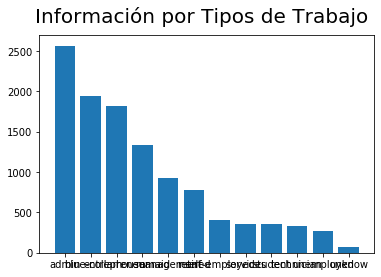

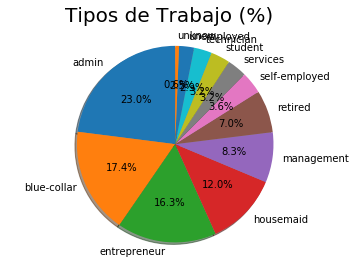

In [13]:
fig = plt.figure('Gráfica de barras') 
ax = fig.add_subplot(111) # 
plt.suptitle('Información por Tipos de Trabajo', fontsize=20)

vals = df_new['Trabajo'].value_counts().tolist()
glabels = ['admin', 'blue-collar', 'entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknow']

xx = range(len(vals))

ax.bar(xx, vals, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(glabels)

plt.show()

sizes = (df_new['Trabajo'].value_counts()/df_new.shape[0])*100


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=glabels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.suptitle('Tipos de Trabajo (%)', fontsize=20)
plt.show()

**Atributo: Marital**

In [14]:
print('Datos únicos que conforman la columna "Marital": ')
print (' ')
print(pd.unique(df_new['Marital']))
print (' ')
print('Cantidad de Datos únicos columna "Marital": ')
len(pd.unique(df_new['Marital']))

Datos únicos que conforman la columna "Marital": 
 
['married' 'single' 'divorced']
 
Cantidad de Datos únicos columna "Marital": 


3

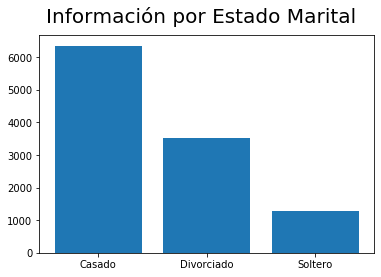

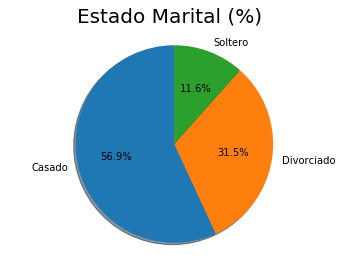

In [15]:
fig = plt.figure('Gráfica de barras') 
ax = fig.add_subplot(111) # 
plt.suptitle('Información por Estado Marital', fontsize=20)

vals = df_new['Marital'].value_counts().tolist()
glabels = ['Casado', 'Divorciado', 'Soltero']

xx = range(len(vals))

ax.bar(xx, vals, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(glabels)

plt.show()


(df_new['Marital'].value_counts()/df_new.shape[0])*100

glabels = ['Casado', 'Divorciado', 'Soltero']
sizes = (df_new['Marital'].value_counts()/df_new.shape[0])*100


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=glabels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.suptitle('Estado Marital (%)', fontsize=20)
plt.show()

**Atributo: Educacion**

In [16]:
print('Datos únicos que conforman la columna "Educacion": ')
print(' ')
print(pd.unique(df_new['Educacion']))
print (' ')
print('Cantidad de Datos únicos columna "Educacion": ')
len(pd.unique(df_new['Educacion']))

Datos únicos que conforman la columna "Educacion": 
 
['secondary' 'tertiary' 'primary' 'unknown']
 
Cantidad de Datos únicos columna "Educacion": 


4

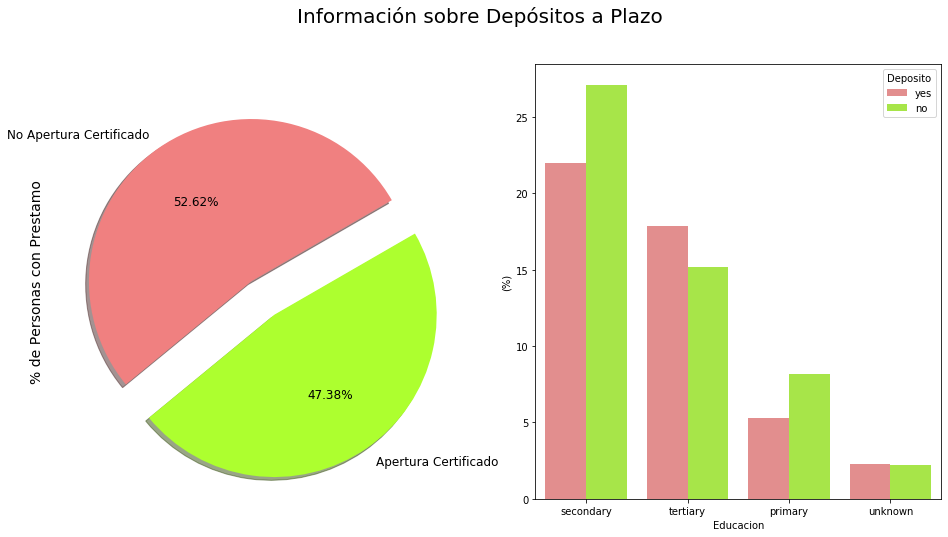

In [17]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ['lightcoral', 'greenyellow']
labels ="No Apertura Certificado", "Apertura Certificado"

plt.suptitle('Información sobre Depósitos a Plazo', fontsize=20)

df_new['Deposito'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=30)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% de Personas con Prestamo', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ['lightcoral', 'greenyellow']

sns.barplot(x="Educacion", y="Saldo", hue="Deposito", data=df_new, palette=palette, estimator=lambda x: len(x) / len(df_new) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df_new['Educacion'].unique(), rotation=0, rotation_mode="anchor")
plt.show()

**Atributo: Credito_Inc**

In [18]:
print('Datos únicos que conforman la columna "Credito_Inc": ')
print(' ')
print(pd.unique(df_new['Credito_Inc']))
print (' ')
print('Cantidad de Datos únicos columna "Credito_Inc": ')
len(pd.unique(df_new['Credito_Inc']))

Datos únicos que conforman la columna "Credito_Inc": 
 
['no' 'yes']
 
Cantidad de Datos únicos columna "Credito_Inc": 


2

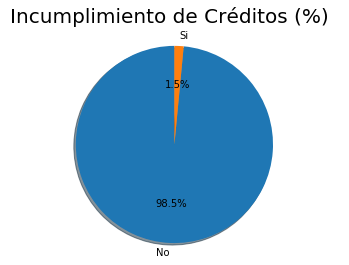

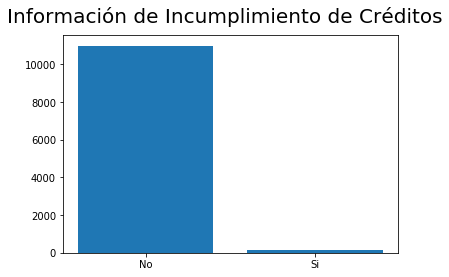

In [19]:
glabels = ['No', 'Si']

sizes = (df_new['Credito_Inc'].value_counts()/df_new.shape[0])*100


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=glabels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.suptitle('Incumplimiento de Créditos (%)', fontsize=20)
plt.show()

fig = plt.figure('Gráfica de barras') 
ax = fig.add_subplot(111) # 
plt.suptitle('Información de Incumplimiento de Créditos', fontsize=20)

vals = df_new['Credito_Inc'].value_counts().tolist()
glabels = ['No', 'Si']

xx = range(len(vals))

ax.bar(xx, vals, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(glabels)

plt.show()

Este atributo **<font color='red'>NO REQUIERE SER TRATADO COMO ONE HOT ENCODE**</font>, pero debe cambiarse sus valores como **DATOS BINARIOS (0 - 1)**

**Atributo: Prestamo_Viv**

In [20]:
print('Datos únicos que conforman la columna "Prestamo_Viv": ')
print(' ')
print(pd.unique(df_new['Prestamo_Viv']))
print (' ')
print('Cantidad de Datos únicos columna "Prestamo_Viv": ')
len(pd.unique(df_new['Prestamo_Viv']))

Datos únicos que conforman la columna "Prestamo_Viv": 
 
['yes' 'no']
 
Cantidad de Datos únicos columna "Prestamo_Viv": 


2

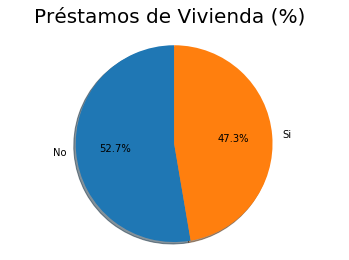

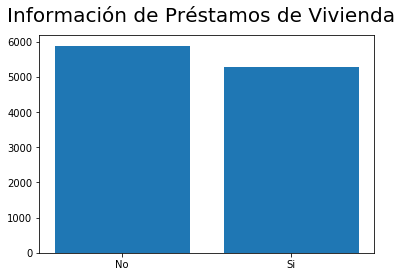

In [21]:
glabels = ['No', 'Si']

sizes = (df_new['Prestamo_Viv'].value_counts()/df_new.shape[0])*100


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=glabels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.suptitle('Préstamos de Vivienda (%)', fontsize=20)
plt.show()

fig = plt.figure('Gráfica de barras') 
ax = fig.add_subplot(111) # 
plt.suptitle('Información de Préstamos de Vivienda', fontsize=20)

vals = df_new['Prestamo_Viv'].value_counts().tolist()
glabels = ['No', 'Si']

xx = range(len(vals))

ax.bar(xx, vals, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(glabels)

plt.show()

Este atributo **<font color='red'>NO REQUIERE SER TRATADO COMO ONE HOT ENCODE**</font>, pero debe cambiarse sus valores como **DATOS BINARIOS (0 - 1)**

**Atributo: Prestamo**

In [22]:
print('Datos únicos que conforman la columna "Prestamo": ')
print(' ')
print(pd.unique(df_new['Prestamo']))
print (' ')
print('Cantidad de Datos únicos columna "Prestamo": ')
len(pd.unique(df_new['Prestamo']))

Datos únicos que conforman la columna "Prestamo": 
 
['no' 'yes']
 
Cantidad de Datos únicos columna "Prestamo": 


2

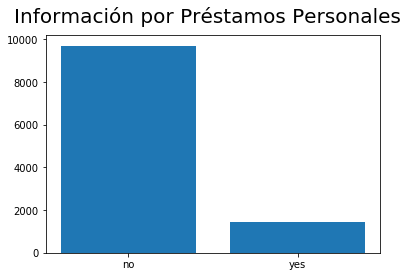

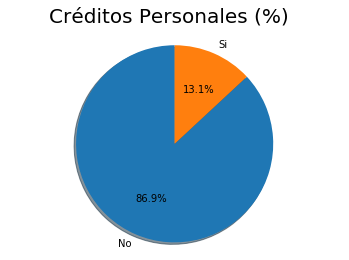

In [23]:
fig = plt.figure('Gráfica de barras') 
ax = fig.add_subplot(111) # 
plt.suptitle('Información por Préstamos Personales', fontsize=20)

vals = df_new['Prestamo'].value_counts().tolist()
glabels = ['no', 'yes']

xx = range(len(vals))

ax.bar(xx, vals, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(glabels)

plt.show()

glabels = ['No', 'Si']

sizes = (df_new['Prestamo'].value_counts()/df_new.shape[0])*100


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=glabels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.suptitle('Créditos Personales (%)', fontsize=20)
plt.show()

Este atributo **<font color='red'>NO REQUIERE SER TRATADO COMO ONE HOT ENCODE**</font>, pero debe cambiarse sus valores como **DATOS BINARIOS (0 - 1)**

**Atributo: Contacto**

In [24]:
print('Datos únicos que conforman la columna "Contacto": ')
print(' ')
print(pd.unique(df_new['Contacto']))
print (' ')
print('Cantidad de Datos únicos columna "Contacto": ')
len(pd.unique(df_new['Contacto']))

Datos únicos que conforman la columna "Contacto": 
 
['unknown' 'cellular' 'telephone']
 
Cantidad de Datos únicos columna "Contacto": 


3

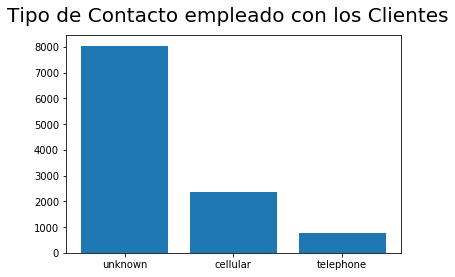

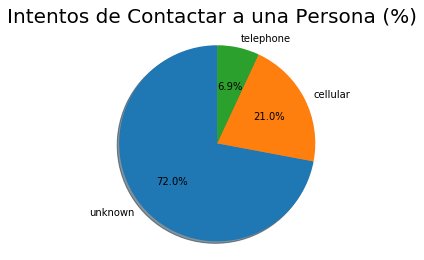

In [25]:
fig = plt.figure('Gráfica de barras') 
ax = fig.add_subplot(111) # 
plt.suptitle('Tipo de Contacto empleado con los Clientes', fontsize=20)

vals = df_new['Contacto'].value_counts().tolist()
glabels = ['unknown', 'cellular', 'telephone']

xx = range(len(vals))

ax.bar(xx, vals, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(glabels)

plt.show()

glabels = ['unknown', 'cellular', 'telephone']

sizes = (df_new['Contacto'].value_counts()/df_new.shape[0])*100


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=glabels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.suptitle('Intentos de Contactar a una Persona (%)', fontsize=20)
plt.show()

**Atributo: Resultado_Prev**

In [26]:
print('Datos únicos que conforman la columna "Resultado_Prev": ')
print(' ')
print(pd.unique(df_new['Resultado_Prev']))
print (' ')
print('Cantidad de Datos únicos columna "Resultado_Prev": ')
len(pd.unique(df_new['Resultado_Prev']))

Datos únicos que conforman la columna "Resultado_Prev": 
 
['unknown' 'other' 'failure' 'success']
 
Cantidad de Datos únicos columna "Resultado_Prev": 


4

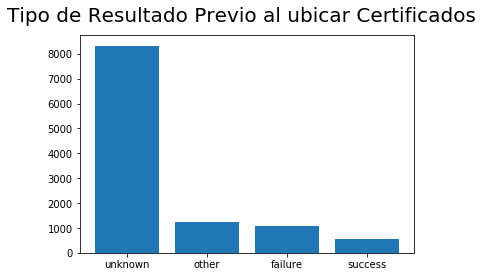

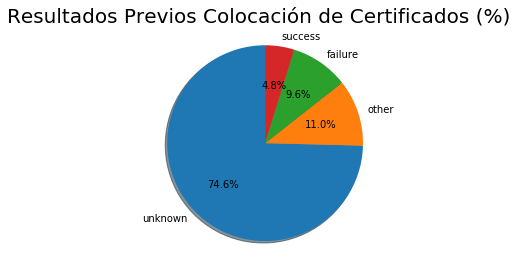

In [27]:
fig = plt.figure('Gráfica de barras') 
ax = fig.add_subplot(111) # 
plt.suptitle('Tipo de Resultado Previo al ubicar Certificados', fontsize=20)

vals = df_new['Resultado_Prev'].value_counts().tolist()
glabels = ['unknown', 'other', 'failure','success']

xx = range(len(vals))

ax.bar(xx, vals, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(glabels)

plt.show()

glabels = ['unknown', 'other', 'failure','success']

sizes = (df_new['Resultado_Prev'].value_counts()/df_new.shape[0])*100


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=glabels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.suptitle('Resultados Previos Colocación de Certificados (%)', fontsize=20)
plt.show()

**Label: Deposito**

In [28]:
print('Datos únicos que conforman la columna "Deposito": ')
print(' ')
print(pd.unique(df_new['Deposito']))
print (' ')
print('Cantidad de Datos únicos columna "Deposito": ')
len(pd.unique(df_new['Deposito']))

Datos únicos que conforman la columna "Deposito": 
 
['yes' 'no']
 
Cantidad de Datos únicos columna "Deposito": 


2

Este atributo **<font color='red'>NO REQUIERE SER TRATADO COMO ONE HOT ENCODE**</font>, pero debe cambiarse sus valores como **DATOS BINARIOS (0 - 1)**

### **a2) Valores Faltantes de datos del Dataset**

- Total de datos por columnas en el DATAFRAME:

In [29]:
df_new.count()

Edad              11162
Trabajo           11162
Marital           11162
Educacion         11162
Credito_Inc       11162
Saldo             11162
Prestamo_Viv      11162
Prestamo          11162
Contacto          11162
Dia               11162
Mes               11162
Duracion          11162
Campana           11162
Dias_Prev         11162
Previo            11162
Resultado_Prev    11162
Deposito          11162
dtype: int64

- Total de datos nulos por columnas en el DATAFRAME:

In [30]:
df_new.isnull().sum()

Edad              0
Trabajo           0
Marital           0
Educacion         0
Credito_Inc       0
Saldo             0
Prestamo_Viv      0
Prestamo          0
Contacto          0
Dia               0
Mes               0
Duracion          0
Campana           0
Dias_Prev         0
Previo            0
Resultado_Prev    0
Deposito          0
dtype: int64

- Validación de la existencia de datos Nulos en el DataSet

In [31]:
df_new.isnull().values.any()

False

Resultado de Verificación Datos Faltantes: **DataSet COMPLETO (NO EXISTEN VALORES FALTANTES)**

### **a3) Outliers (Datos fuera de los valores normales)**

Existen valores del atributo Saldo que son **negativos**, los cuales podrían ser tomados como datos utliers (fuera de los valores normales).

In [32]:
df_new[df_new['Saldo'] < 0]['Saldo'].count()

688

Aunque existan 688 valores con **Saldo** en cuenta con valores negativos en las personas encuestadas, no pueden tomarse estos 
valores como si fueran datos outliers, debido a que esta condición puede presentarse en la vida real. Esto puede ocurrir cuando la persona se encarga de servir de fiador a otra persona y esta deja de asumir su responsabilidad de pago, en este momento, el fiador puede llegar a presentar problemas de pago que produzcan que su saldo (balance) llegue a ser negativo.

Basándose en la **naturaleza de estos datos**, estos valores pueden llegar a presentarse en la vida real.

Por este motivo, se decide mantener como **valores válidos en el análisis**.

Lo que se efectuará, es un pequeño análisis de lo que ocurriría si se decidiera remover los datos usando desviación estándar.

**Atributo: Saldo**

- Cálculo de datos de **Atributo Saldo** dentro de (mean + 2${ \sigma }$) y (mean - 2${ \sigma }$)

In [33]:
final_list = []
final_list = [x for x in df_new['Saldo'] if (x > df_new['Saldo'].mean() - 2 * df_new['Saldo'].std())]
final_list = [x for x in final_list if (x < df_new['Saldo'].mean() + 2 * df_new['Saldo'].std())]
print('Cantidad de datos dentro de +- 2 sigma    : ', len(final_list))
print('Cantidad de datos dentro de +- 2 sigma (%): ', (len(final_list)/df_new.shape[0])*100)

Cantidad de datos dentro de +- 2 sigma    :  10818
Cantidad de datos dentro de +- 2 sigma (%):  96.91811503314818


Si nos basáramos en el criterio anterior y se decidiera mantener solamente los datos dentro de (mean + 2${ \sigma }$) y (mean - 2${ \sigma }$); de los supuestos datos outliers del atributo **saldo** quedarían :

In [34]:
final_list = [x for x in final_list if (x < 0)]
print(len(final_list))

687


Lo anterior confirma que estos datos se encuentran dentro de mean +- 2${ \sigma }$, debido a que solamente se eliminaría un dato de ellos.

In [35]:
print('Cantidad de datos de atributo Saldo que se eliminarían si se empleara la regla: mean +- 2 sigma ')
df_new[df_new['Saldo'] < 0]['Saldo'].count() - len(final_list)

Cantidad de datos de atributo Saldo que se eliminarían si se empleara la regla: mean +- 2 sigma 


1

- Cálculo de datos de **Atributo Saldo** dentro de (mean + 3${ \sigma }$) y (mean - 3${ \sigma }$)

In [36]:
final_list = []
final_list = [x for x in df_new['Saldo'] if (x > df_new['Saldo'].mean() - 3 * df_new['Saldo'].std())]
final_list = [x for x in final_list if (x < df_new['Saldo'].mean() + 3 * df_new['Saldo'].std())]
print('Cantidad de datos dentro de +- 3 sigma    : ', len(final_list))
print('Cantidad de datos dentro de +- 3 sigma (%): ', (len(final_list)/df_new.shape[0])*100)

Cantidad de datos dentro de +- 3 sigma    :  10989
Cantidad de datos dentro de +- 3 sigma (%):  98.45009854864719


Si nos basáramos en lo anterior, de los supuestos datos outliers del atributo saldo quedarían :

In [37]:
final_list = [x for x in final_list if (x < 0)]
print(len(final_list))

688


Lo anterior confirma que estos datos TODOS dentro del criterio mean +- 3${ \sigma }$, debido a que **TODOS QUEDAN DENTRO DE ESTE ÁMBITO**

In [38]:
print('Cantidad de datos de atributo Saldo que se eliminarían si se empleara la regla: mean +- 3 sigma ')
df_new[df_new['Saldo'] < 0]['Saldo'].count() - len(final_list)

Cantidad de datos de atributo Saldo que se eliminarían si se empleara la regla: mean +- 3 sigma 


0

### **a4) Datos No - Balanceados del Dataset**

Como citerio importante, debemos verificar que se tenga una cantidad de datos similar entre los datos de la <font color='red'>**CLASE**</font> que se desea predecir (**atributo Deposito**). 

Algunos Clasificadores de Aprendizaje Automático no lidian muy bien con datasets de entrenamiento desbalanceados ya que son sensibles a las proporciones de las diferentes clases. Como consecuencia, estos algoritmos tienden a favorecer la clase con la mayor proporción de observaciones (conocida como clase mayoritaria), lo cual puede derivar en métricas de exactitud sesgadas. Esto puede ser particularmente problemático cuando estamos interesados en la clasificación correcta de una clase “rara” (también conocida como clase minoritaria) pero encontramos altos valores de exactitud que son producto realmente de la clasificación correcta de la clase mayoritaria y por tanto son un reflejo de la distribución de clases subyacente.

**Verificación de datos Balanceados de columna <font color='red'>CLASE (Atributo Deposito)</font>**

- **Cantidad de datos para cada clase a predecir**

In [39]:
(df_new['Deposito'].value_counts())

no     5873
yes    5289
Name: Deposito, dtype: int64

- **Porcentaje de datos para cada clase a predecir**

In [40]:
(df_new['Deposito'].value_counts()/df_new.shape[0])*100

no     52.616019
yes    47.383981
Name: Deposito, dtype: float64

Resumen de datos columna **CLASE (Atributo Deposito)**:

Deposito | Total Datos | Porcentaje
------------ | ------------- | ------------- |
yes | 5289 | 47,38% | 
no | 5873 | 52,62% | 

Existe una diferencia de un 5% entre datos (584 datos). Por tanto, los datos a predecir **ESTAN BALANCEADOS**.

- **Cantidad de datos por variables de otros Atributos**

- **Atributo Trabajo**

**Datos por tipo de Trabajo:**

In [41]:
df_new['Trabajo'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: Trabajo, dtype: int64

**Porcentaje de datos por tipo de Trabajo:**

In [42]:
(df_new['Trabajo'].value_counts()/df_new.shape[0])*100

management       22.988712
blue-collar      17.416234
technician       16.332199
admin.           11.951263
services          8.269127
retired           6.970077
self-employed     3.628382
student           3.225228
unemployed        3.198352
entrepreneur      2.938541
housemaid         2.454757
unknown           0.627128
Name: Trabajo, dtype: float64

- **Atributo Educacion**

**Porcentaje de datos por tipo de Educacion de los encuestados:**

In [43]:
(df_new['Educacion'].value_counts()/df_new.shape[0])*100

secondary    49.059308
tertiary     33.049633
primary      13.438452
unknown       4.452607
Name: Educacion, dtype: float64

- **Atributo Marital**

**Porcentaje de datos de acuerdo al estado Marital:**

In [44]:
(df_new['Marital'].value_counts()/df_new.shape[0])*100

married     56.898405
single      31.517649
divorced    11.583946
Name: Marital, dtype: float64

### **a5) Transformación de datos del Dataset**

##### a5.1) Variables categóricas (DATOS BINARIOS)

Del conjunto de datos se identifican las siguientes variables categoricas a convertir en datos binarios:

**Credito_Inc (Atributo)**

**Prestamo_Viv (Atributo)**

**Prestamo (Atributo)**

**Deposito (Clase)**

Para todo los casos, la convención a utilizar será:

**<font color='blue'>yes</font>** = <font color='blue'>1</font>

**<font color='blue'>no</font>** = <font color='blue'>0</font>

* **Atributo: Credito_Inc**

In [45]:
df_new['Credito_Inc'] = df_new['Credito_Inc'].replace({'no' : 0, 'yes' : 1})

* **Atributo: Prestamo_Viv**

In [46]:
df_new['Prestamo_Viv'] = df_new['Prestamo_Viv'].replace({'no' : 0, 'yes' : 1})

* **Atributo: Prestamo**

In [47]:
df_new['Prestamo'] = df_new['Prestamo'].replace({'no' : 0, 'yes' : 1})

* **Clase: Deposito**

In [48]:
deposito  = ["no", "yes"]
df_new['Deposito'] = df_new['Deposito'].replace({deposito[0] : 0, deposito[1] : 1})

##### Visualización del dataset con cambios de variables cateógicas (datos binarios):

In [49]:
df_new.head(10)

,Edad,Trabajo,Marital,Educacion,Credito_Inc,Saldo,Prestamo_Viv,Prestamo,Contacto,Dia,Mes,Duracion,Campana,Dias_Prev,Previo,Resultado_Prev,Deposito
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1
5,42,management,single,tertiary,0,0,1,1,unknown,5,may,562,2,-1,0,unknown,1
6,56,management,married,tertiary,0,830,1,1,unknown,6,may,1201,1,-1,0,unknown,1
7,60,retired,divorced,secondary,0,545,1,0,unknown,6,may,1030,1,-1,0,unknown,1
8,37,technician,married,secondary,0,1,1,0,unknown,6,may,608,1,-1,0,unknown,1
9,28,services,single,secondary,0,5090,1,0,unknown,6,may,1297,3,-1,0,unknown,1


Text(0.5, 0.98, 'Gráfico de Dispersión: Duración Llamada vs Día del Mes')

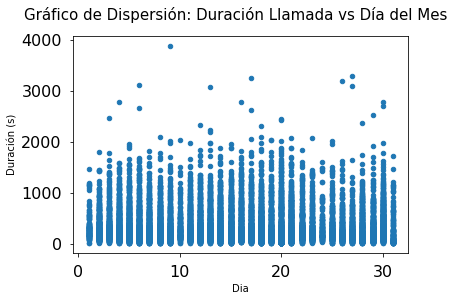

In [50]:
fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df_new.plot("Dia", "Duracion", kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Dia")
ax1.set_ylabel("Duración (s)")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Gráfico de Dispersión: Duración Llamada vs Día del Mes', fontsize=15)

Text(0.5, 0.98, 'Gráfico de Dispersion: Duración Llamada vs Campaña')

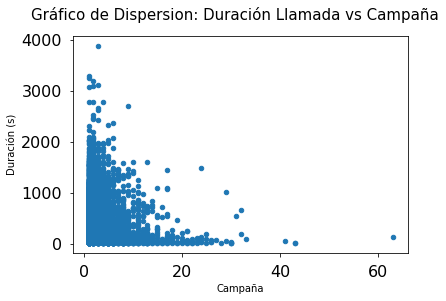

In [51]:
fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

df_new.plot("Campana", "Duracion", kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Campaña")
ax1.set_ylabel("Duración (s)")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Gráfico de Dispersion: Duración Llamada vs Campaña', fontsize=15)

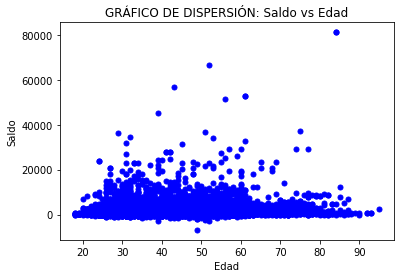

In [52]:
x0_rot = 0
y0_rot = 0

# Create plot of centered data values
plt.scatter(df_new['Edad'], df_new['Saldo'], label='Valores Centrados', color='b', s=25, marker="o")

# Create plot of center of data_values
#plt.scatter(x0_rot, x0_rot, label='Valores Centrados', color='r', s=25, marker="x")

plt.xlabel('Edad')
plt.ylabel('Saldo')
plt.title('GRÁFICO DE DISPERSIÓN: Saldo vs Edad')
#plt.legend()
plt.show()

##### a5.2) Variables categóricas ONE HOT ENCODE (VECTORES BINARIOS)

Del conjunto de datos se identifican las siguientes variables categoricas a convertir en vectores binarios:

**Trabajo (Atributo)**

**Marital (Atributo)**

**Educacion (Atributo)**

**Contacto (Atributo)**

**Mes (Atributo)**

**Resultado_Prev (Atributo)**

* **Aplicación de ONE HOT ENCODE a los atributos anteriores**

In [53]:
df_new = pd.get_dummies(df_new, columns=['Trabajo'])
df_new = pd.get_dummies(df_new, columns=['Marital'])
df_new = pd.get_dummies(df_new, columns=['Educacion'])
df_new = pd.get_dummies(df_new, columns=['Contacto'])
df_new = pd.get_dummies(df_new, columns=['Mes'])
df_new = pd.get_dummies(df_new, columns=['Resultado_Prev'])

- Visualización de los primeros 10 datos del DataSet con **cambio de Datos Categóricos**:

In [54]:
df_new.head(10)

,Edad,Credito_Inc,Saldo,Prestamo_Viv,Prestamo,Dia,Duracion,Campana,Dias_Prev,Previo,...,Mes_jun,Mes_mar,Mes_may,Mes_nov,Mes_oct,Mes_sep,Resultado_Prev_failure,Resultado_Prev_other,Resultado_Prev_success,Resultado_Prev_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,56,0,45,0,0,5,1467,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,41,0,1270,1,0,5,1389,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,55,0,2476,1,0,5,579,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,54,0,184,0,0,5,673,2,-1,0,...,0,0,1,0,0,0,0,0,0,1
5,42,0,0,1,1,5,562,2,-1,0,...,0,0,1,0,0,0,0,0,0,1
6,56,0,830,1,1,6,1201,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
7,60,0,545,1,0,6,1030,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
8,37,0,1,1,0,6,608,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
9,28,0,5090,1,0,6,1297,3,-1,0,...,0,0,1,0,0,0,0,0,0,1


- Visualización de nombres de columnas del DataSet Completo con **cambio de Datos Categóricos**:

In [55]:
df_new.columns

Index(['Edad', 'Credito_Inc', 'Saldo', 'Prestamo_Viv', 'Prestamo', 'Dia',
       'Duracion', 'Campana', 'Dias_Prev', 'Previo', 'Deposito',
       'Trabajo_admin.', 'Trabajo_blue-collar', 'Trabajo_entrepreneur',
       'Trabajo_housemaid', 'Trabajo_management', 'Trabajo_retired',
       'Trabajo_self-employed', 'Trabajo_services', 'Trabajo_student',
       'Trabajo_technician', 'Trabajo_unemployed', 'Trabajo_unknown',
       'Marital_divorced', 'Marital_married', 'Marital_single',
       'Educacion_primary', 'Educacion_secondary', 'Educacion_tertiary',
       'Educacion_unknown', 'Contacto_cellular', 'Contacto_telephone',
       'Contacto_unknown', 'Mes_apr', 'Mes_aug', 'Mes_dec', 'Mes_feb',
       'Mes_jan', 'Mes_jul', 'Mes_jun', 'Mes_mar', 'Mes_may', 'Mes_nov',
       'Mes_oct', 'Mes_sep', 'Resultado_Prev_failure', 'Resultado_Prev_other',
       'Resultado_Prev_success', 'Resultado_Prev_unknown'],
      dtype='object')

### **ATRIBUTOS / LABEL A EMPLEAR EN EL MODELO DE CLASIFICACIÓN**

Se utilizará los siguientes atributos en el modelo de clasificación:

## <font color='green'>**FEATURES** </font>: 

<font color='blue'>**Edad**</font>       = **age** <font color='magenta'>(DATO NUMÉRICO)</font>

<font color='blue'>**Trabajo**</font>       = **job** <font color='magenta'>(DATO CATEGÓRICO)</font>
     
<font color='blue'>**Marital**</font>      = **marital** <font color='magenta'>(DATO CATEGÓRICO)</font>
 
<font color='blue'>**Educacion**</font>      = **education** <font color='magenta'>(DATO CATEGÓRICO)</font>
 
<font color='blue'>**Credito_Inc**</font>     = **default** <font color='magenta'>(DATO CATEGÓRICO - BINARIO)</font>
     
<font color='blue'>**Prestamo_Viv**</font>  = **housing** <font color='magenta'>(DATO CATEGÓRICO - BINARIO)</font>
 
<font color='blue'>**Prestamo**</font>     = **loan** <font color='magenta'>(DATO CATEGÓRICO - BINARIO)</font>

<font color='blue'>**Saldo**</font>       = **balance** <font color='magenta'>(DATO NUMÉRICO)</font>
 
<font color='blue'>**Contacto**</font>  = **contact** <font color='magenta'>(DATO CATEGÓRICO)</font>
 
<font color='blue'>**Resultado_Prev**</font>  = **poutcome** <font color='magenta'>(DATO CATEGÓRICO)</font>



## <font color='red'>**LABEL** </font>: 

<font color='blue'>**Deposito**</font>  = **deposit** <font color='magenta'>(DATO CATEGÓRICO - BINARIO)</font>



 



##### Asignación de Atributos a evaluar en el dataset :

In [56]:
df_class = df_new.copy()
df_class = df_class[['Edad', 'Trabajo_admin.', 'Trabajo_blue-collar', 'Trabajo_entrepreneur', 'Trabajo_housemaid', 
                   'Trabajo_management', 'Trabajo_retired', 'Trabajo_self-employed', 'Trabajo_services', 'Trabajo_student', 
                   'Trabajo_technician', 'Trabajo_unemployed', 'Trabajo_unknown', 'Marital_divorced', 'Marital_married', 
                   'Marital_single', 'Educacion_primary', 'Educacion_secondary', 'Educacion_tertiary', 'Educacion_unknown', 
                   'Credito_Inc', 'Prestamo_Viv', 'Prestamo', 'Saldo', 'Contacto_cellular', 'Contacto_telephone', 
                   'Contacto_unknown', 'Resultado_Prev_failure', 'Resultado_Prev_other', 'Resultado_Prev_success', 
                   'Resultado_Prev_unknown', 'Deposito']]

##### Visualización del dataset con atributos a evaluar:

In [57]:
df_class.head(10)

,Edad,Trabajo_admin.,Trabajo_blue-collar,Trabajo_entrepreneur,Trabajo_housemaid,Trabajo_management,Trabajo_retired,Trabajo_self-employed,Trabajo_services,Trabajo_student,...,Prestamo,Saldo,Contacto_cellular,Contacto_telephone,Contacto_unknown,Resultado_Prev_failure,Resultado_Prev_other,Resultado_Prev_success,Resultado_Prev_unknown,Deposito
0,59,1,0,0,0,0,0,0,0,0,...,0,2343,0,0,1,0,0,0,1,1
1,56,1,0,0,0,0,0,0,0,0,...,0,45,0,0,1,0,0,0,1,1
2,41,0,0,0,0,0,0,0,0,0,...,0,1270,0,0,1,0,0,0,1,1
3,55,0,0,0,0,0,0,0,1,0,...,0,2476,0,0,1,0,0,0,1,1
4,54,1,0,0,0,0,0,0,0,0,...,0,184,0,0,1,0,0,0,1,1
5,42,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1
6,56,0,0,0,0,1,0,0,0,0,...,1,830,0,0,1,0,0,0,1,1
7,60,0,0,0,0,0,1,0,0,0,...,0,545,0,0,1,0,0,0,1,1
8,37,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,1
9,28,0,0,0,0,0,0,0,1,0,...,0,5090,0,0,1,0,0,0,1,1


### **a6) Normalización de datos del Dataset**

#### Instalación de Dependencias (Librerías) - SCIKIT-LEARN
#### Requeridas para NORMALIZAR - ESTANDARIZAR los datos

In [58]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

### NORMALIZACIÓN de DATA (SCIKIT-LEARN)

In [59]:
# Copia de DataSet df 
# df_norm será el DataSet con los datos normalizados

df_norm = df_class.copy()

# train the normalization
scaler = MinMaxScaler()

scaler = scaler.fit(df_norm)

# normalize the dataset
dfsk_norm = scaler.transform(df_norm)

# Tamaño de los datos normalizados (arreglo numpy)
print('Tamaños del DataSet Normalizazado: ')
print(dfsk_norm.shape)
print(' ')

print('Primeros 5 datos de DataSet NO Normalizazado: ')
print(df_new.head(5))
print(' ')

# Traslado de valores normalizados a las columnas correspondientes
# Si se quisiera trasladar todos los datos numpy normalizados sería:
#df_norm[:] = dfsk_norm[:]
df_norm['Edad'] = dfsk_norm[:,0]
df_norm['Saldo'] = dfsk_norm[:,23]

print('Primeros 5 datos de DataSet Normalizado: ')
df_norm.head(10)

Tamaños del DataSet Normalizazado: 
(11162, 32)
 
Primeros 5 datos de DataSet NO Normalizazado: 
   Edad  Credito_Inc  Saldo  Prestamo_Viv  Prestamo  Dia  Duracion  Campana  \
0    59            0   2343             1         0    5      1042        1   
1    56            0     45             0         0    5      1467        1   
2    41            0   1270             1         0    5      1389        1   
3    55            0   2476             1         0    5       579        1   
4    54            0    184             0         0    5       673        2   

   Dias_Prev  Previo  ...  Mes_jun  Mes_mar  Mes_may  Mes_nov  Mes_oct  \
0         -1       0  ...        0        0        1        0        0   
1         -1       0  ...        0        0        1        0        0   
2         -1       0  ...        0        0        1        0        0   
3         -1       0  ...        0        0        1        0        0   
4         -1       0  ...        0        0        1      

,Edad,Trabajo_admin.,Trabajo_blue-collar,Trabajo_entrepreneur,Trabajo_housemaid,Trabajo_management,Trabajo_retired,Trabajo_self-employed,Trabajo_services,Trabajo_student,...,Prestamo,Saldo,Contacto_cellular,Contacto_telephone,Contacto_unknown,Resultado_Prev_failure,Resultado_Prev_other,Resultado_Prev_success,Resultado_Prev_unknown,Deposito
0,0.532468,1,0,0,0,0,0,0,0,0,...,0,0.104371,0,0,1,0,0,0,1,1
1,0.493506,1,0,0,0,0,0,0,0,0,...,0,0.078273,0,0,1,0,0,0,1,1
2,0.298701,0,0,0,0,0,0,0,0,0,...,0,0.092185,0,0,1,0,0,0,1,1
3,0.480519,0,0,0,0,0,0,0,1,0,...,0,0.105882,0,0,1,0,0,0,1,1
4,0.467532,1,0,0,0,0,0,0,0,0,...,0,0.079851,0,0,1,0,0,0,1,1
5,0.311688,0,0,0,0,1,0,0,0,0,...,1,0.077762,0,0,1,0,0,0,1,1
6,0.493506,0,0,0,0,1,0,0,0,0,...,1,0.087188,0,0,1,0,0,0,1,1
7,0.545455,0,0,0,0,0,1,0,0,0,...,0,0.083951,0,0,1,0,0,0,1,1
8,0.246753,0,0,0,0,0,0,0,0,0,...,0,0.077773,0,0,1,0,0,0,1,1
9,0.129870,0,0,0,0,0,0,0,1,0,...,0,0.135569,0,0,1,0,0,0,1,1


Para este Proyecto, trataremos de **Clasificar** de acuerdo a los atributos del DataSet elegidos anteriormente, si la persona puede toma un Depósito a Plazo (Clase = Deposito).

### ESTANDARIZACIÓN de DATA (SCIKIT-LEARN)

In [60]:
# standardize the data attributes
#Xsk_estand_data = preprocessing.scale(XTemp)
Xsk_estand_data = preprocessing.scale(df_class[['Edad', 'Saldo']].values)

In [61]:
# Copia de DataSet df_class
# df_estand será el DataSet con los datos estandarizados
df_estand = df_class.copy()

# Traslado de valores estandarizados a las columnas correspondientes
# Si se quisiera trasladar todos los datos numpy normalizados sería:
df_estand['Edad'] = Xsk_estand_data[:,0]
df_estand['Saldo'] = Xsk_estand_data[:,1]

In [62]:
df_estand.head(10)

,Edad,Trabajo_admin.,Trabajo_blue-collar,Trabajo_entrepreneur,Trabajo_housemaid,Trabajo_management,Trabajo_retired,Trabajo_self-employed,Trabajo_services,Trabajo_student,...,Prestamo,Saldo,Contacto_cellular,Contacto_telephone,Contacto_unknown,Resultado_Prev_failure,Resultado_Prev_other,Resultado_Prev_success,Resultado_Prev_unknown,Deposito
0,1.491505,1,0,0,0,0,0,0,0,0,...,0,0.252525,0,0,1,0,0,0,1,1
1,1.239676,1,0,0,0,0,0,0,0,0,...,0,-0.459974,0,0,1,0,0,0,1,1
2,-0.019470,0,0,0,0,0,0,0,0,0,...,0,-0.080160,0,0,1,0,0,0,1,1
3,1.155733,0,0,0,0,0,0,0,1,0,...,0,0.293762,0,0,1,0,0,0,1,1
4,1.071790,1,0,0,0,0,0,0,0,0,...,0,-0.416876,0,0,1,0,0,0,1,1
5,0.064473,0,0,0,0,1,0,0,0,0,...,1,-0.473926,0,0,1,0,0,0,1,1
6,1.239676,0,0,0,0,1,0,0,0,0,...,1,-0.216583,0,0,1,0,0,0,1,1
7,1.575448,0,0,0,0,0,1,0,0,0,...,0,-0.304948,0,0,1,0,0,0,1,1
8,-0.355243,0,0,0,0,0,0,0,0,0,...,0,-0.473616,0,0,1,0,0,0,1,1
9,-1.110730,0,0,0,0,0,0,0,1,0,...,0,1.104237,0,0,1,0,0,0,1,1


### Modelos de CLASIFICACIÓN

La estandarización supone que sus observaciones se ajustan a una distribución gaussiana (curva de campana) con una media y una desviación estándar bien comportadas. Si no se cumple esta expectativa, es posible que no se obtenga resultados confiables.

Esto incluye algoritmos como Máquinas de vectores de soporte, Regresión lineal y logística, y otros algoritmos que suponen o tienen un rendimiento mejorado con datos gaussianos.

Para este Proyecto, emplearemos los modelos de Clasificación:

* **Logistic Regression.**

* **Decision Tree.**

* **Random Forest.**

Por este motivo, emplearemos datos **ESTANDARIZADOS** en la evaluación de los datos del dataset.



## <font color = 'red'>EVALUACIÓN #1</font>

**Escogencia de features y label del modelo a emplear:**

In [63]:
#features = df_norm[df_norm.columns[df_norm.columns !='Deposito']]
#labels = df_norm['Deposito']

features = df_estand[df_estand.columns[df_estand.columns !='Deposito']]
labels = df_estand['Deposito']

**Partición del DataSet en Datos de Training y Testing**:

Se empleará 70% de datos para el training, 30% de datos para testing

In [64]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state = 9)
#X_train_norm,X_test_norm, y_train_norm, y_test_norm = train_test_split(features1, labels1, test_size=0.20, random_state = 13)

Verificación de tamaños de los datos de Training y Testing:

In [65]:
print('Tamaño de X_train: ')
print(X_train.shape)
print(' ')
print('Tamaño de X_test: ')
print(X_test.shape)
print(' ')
print('Tamaño de y_train: ')
print(y_train.shape)
print(' ')
print('Tamaño de y_test: ')
print(y_test.shape)


Tamaño de X_train: 
(7813, 31)
 
Tamaño de X_test: 
(3349, 31)
 
Tamaño de y_train: 
(7813,)
 
Tamaño de y_test: 
(3349,)


### 1) Logistic Regression

**Implementación del Clasificador**

Importación del Modelo del Clasificador de sklearn

In [66]:
from sklearn.linear_model import LogisticRegression

**Definición del modelo del clasificador**

In [67]:
classifier = LogisticRegression(random_state = 0)
#classifier = LogisticRegression(random_state = 0, max_iter=1000, solver='lbfgs', multi_class='multinomial')

**Entrenamiento del Clasificador**

In [68]:
classifier.fit(X_train, y_train)
#classifier.fit(X_train_norm, y_train_norm)

C:\Users\rasala\AppData\Local\Continuum\miniconda3\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Predicción de los valores de Test**

In [69]:
y_pred = classifier.predict(X_test)
#y_pred_norm = classifier.predict(X_test_norm)

**Resultados obtenidos por el modelo con valores Test:**

In [70]:
score_test =classifier.score(X_test, y_test)
#score_test_norm =classifier.score(X_test_norm, y_test_norm)

print('Score Test DataSet NORMALIZADO: ')
print(score_test * 100)
print(' ')
print('Score Test DataSet NO NORMALIZADO: ')
#print(score_test_norm * 100)

Score Test DataSet NORMALIZADO: 
67.42311137653031
 
Score Test DataSet NO NORMALIZADO: 


### 2) Decision Tree

**Partición del DataSet en Datos de Training y Testing**:

Se empleará 80% de datos para el training, 20% de datos para testing

In [71]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state = 13)

**Implementación del Clasificador**

Importación del Modelo del Clasificador de sklearn

In [72]:
from sklearn.tree import DecisionTreeClassifier

**Definición del modelo del clasificador**

Se le da profundidad = 9

In [73]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = 9)

**Entrenamiento del Clasificador**

In [74]:
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Predicción de los valores de Test**

In [75]:
y_predict = DecisionTreeModel.predict(X_test)

**Resultados obtenidos por el modelo con valores Test:**

Se importa la metrica

In [76]:
from sklearn.metrics import accuracy_score

**Precisión de la clasificación del testing**

In [77]:
dt1 = accuracy_score(y_test, y_predict)
dt1

0.6824899238692342

**Visualización del Árbol:**

In [78]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTreeModel, out_file='simple_tree.dot', feature_names=features.columns,impurity=False,class_names=[deposito[0],deposito[1]],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'simple_tree.dot', '-o', 'simple_tree.png'],shell=True)

0

Desplegamos la imagen del árbol con las siguiente instrucción:
    <img src='simple_tree.png' width = 1000px> 

### 3) Random Forest

**Partición del DataSet en Datos de Training y Testing**:

Se empleará 70% de datos para el training, 30% de datos para testing

In [79]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state = 2)

**Definición del modelo del clasificador**

In [80]:
RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=15,n_estimators=500, max_depth= 7, random_state=10)

**Entrenamiento del Clasificador**

In [81]:
RandomForestModel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

**Predicción de los valores de Test**

In [82]:
y_predict = RandomForestModel.predict(X_test)

**Precisión de la clasificación del testing**

In [83]:
rf = accuracy_score(y_test,y_predict)
rf

0.7002090176171991

**Visualización del Árbol:**

In [84]:
from sklearn.tree import export_graphviz
estimator = RandomForestModel.estimators_[0]
export_graphviz(estimator, out_file='complete_tree.dot', feature_names=features.columns,impurity=False,class_names=[deposito[0],deposito[1]],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'complete_tree.dot', '-o', 'complete_tree.png'],shell=True)

0

<img src='complete_tree.png' width = 1000px>

In [85]:
importances = pd.DataFrame({'feature' : X_train.columns, 'importance':RandomForestModel.feature_importances_})

In [86]:
importances = pd.DataFrame({'feature' : X_train.columns, 'importance':RandomForestModel.feature_importances_})

In [87]:
importances = importances.sort_values('importance', ascending = False).set_index('feature')

In [88]:
importances.head(9)

,importance
feature,
Resultado_Prev_success,0.227845
Contacto_unknown,0.137315
Edad,0.118336
Saldo,0.093876
Resultado_Prev_unknown,0.087806
Contacto_cellular,0.081545
Prestamo_Viv,0.075100
Prestamo,0.027749
Marital_single,0.017417


In [89]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

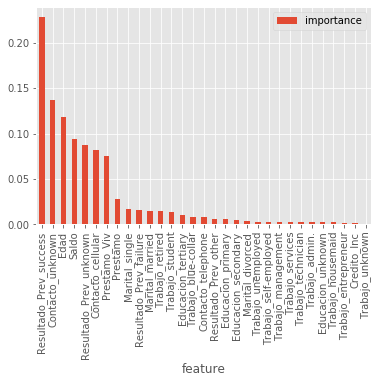

In [90]:
importances.plot.bar()

**Resumen de Precisiones Obtenidas:**

Clasificador | Precisión (%)
------------ | ------------- 
Logistic Regression | 67,42 % 
Decision Tree | 68,20 % 
Random Forest | 70,02 % 

## <font color = 'red'>EVALUACIÓN #2</font>

Debido a que la precisión obtenida con los tres modelos de clasificación fue muy similar, luego de variar los **parámetros**:

**test_size, random_state** en el train_test_split.

**random_state, max_iter** en la definición del modelo del Clasificador Logistic Regression.

**random_state, max_depth** en la definición del modelo del Clasificador Decision Tree.

**random_state, test_size, min_samples_split, min_sample_leaf, max_depht** en la definición del modelo del Clasificador Random Forest.


Definimos que la manera de poder incrementar la precisión del modelo, era **aumentando la cantidad de features a evaluar**, lo que se procedió a efectuar en esta **EVALUACIÓN #2**.

### **ATRIBUTOS / LABEL A EMPLEAR EN EL MODELO DE CLASIFICACIÓN**

Se utilizará los siguientes atributos en el modelo de clasificación:

## <font color='green'>**FEATURES** </font>: 

<font color='blue'>**Edad**</font>       = **age** <font color='magenta'>(DATO NUMÉRICO)</font>

<font color='blue'>**Trabajo**</font>       = **job** <font color='magenta'>(DATO CATEGÓRICO)</font>
     
<font color='blue'>**Marital**</font>      = **marital** <font color='magenta'>(DATO CATEGÓRICO)</font>
 
<font color='blue'>**Educacion**</font>      = **education** <font color='magenta'>(DATO CATEGÓRICO)</font>
 
<font color='blue'>**Credito_Inc**</font>     = **default** <font color='magenta'>(DATO CATEGÓRICO - BINARIO)</font>
     
<font color='blue'>**Prestamo_Viv**</font>  = **housing** <font color='magenta'>(DATO CATEGÓRICO - BINARIO)</font>
 
<font color='blue'>**Prestamo**</font>     = **loan** <font color='magenta'>(DATO CATEGÓRICO - BINARIO)</font>

<font color='blue'>**Saldo**</font>       = **balance** <font color='magenta'>(DATO NUMÉRICO)</font>
 
<font color='blue'>**Contacto**</font>  = **contact** <font color='magenta'>(DATO CATEGÓRICO)</font>
 
<font color='blue'>**Mes**</font> = **month** <font color='magenta'>(DATO CATEGÓRICO)</font>
 
<font color='blue'>**Dia**</font>   = **day** <font color='red'>(DATO NUMÉRICO)</font>

<font color='blue'>**Duracion**</font>   = **day** <font color='red'>(DATO NUMÉRICO)</font>

<font color='blue'>**Campana**</font>   = **day** <font color='red'>(DATO NUMÉRICO)</font>

<font color='blue'>**Dias_Prev**</font>   = **day** <font color='red'>(DATO NUMÉRICO)</font>

<font color='blue'>**Previo**</font>   = **day** <font color='red'>(DATO NUMÉRICO)</font>
 
<font color='blue'>**Resultado_Prev**</font>  = **poutcome** <font color='magenta'>(DATO CATEGÓRICO)</font>



## <font color='red'>**LABEL** </font>: 

<font color='blue'>**Deposito**</font>  = **deposit** <font color='magenta'>(DATO CATEGÓRICO - BINARIO)</font>



 



##### Asignación de Atributos a evaluar en el dataset :

In [91]:
df_class = df_new.copy()
df_class = df_class[['Edad', 'Trabajo_admin.', 'Trabajo_blue-collar', 'Trabajo_entrepreneur', 'Trabajo_housemaid', 
                   'Trabajo_management', 'Trabajo_retired', 'Trabajo_self-employed', 'Trabajo_services', 'Trabajo_student', 
                   'Trabajo_technician', 'Trabajo_unemployed', 'Trabajo_unknown', 'Marital_divorced', 'Marital_married', 
                   'Marital_single', 'Educacion_primary', 'Educacion_secondary', 'Educacion_tertiary', 'Educacion_unknown', 
                   'Credito_Inc', 'Prestamo_Viv', 'Prestamo', 'Saldo', 'Contacto_cellular', 'Contacto_telephone', 
                   'Contacto_unknown', 'Mes_apr', 'Mes_aug', 'Mes_dec', 'Mes_feb', 'Mes_jan', 'Mes_jul', 'Mes_jun', 'Mes_mar', 
                    'Mes_may', 'Mes_nov', 'Mes_oct', 'Mes_sep', 'Dia', 'Duracion', 'Campana', 'Dias_Prev', 'Previo', 
                    'Resultado_Prev_failure', 'Resultado_Prev_other', 'Resultado_Prev_success', 'Resultado_Prev_unknown', 
                    'Deposito']]

##### Visualización del dataset con atributos a evaluar:

In [92]:
df_class.head(10)

,Edad,Trabajo_admin.,Trabajo_blue-collar,Trabajo_entrepreneur,Trabajo_housemaid,Trabajo_management,Trabajo_retired,Trabajo_self-employed,Trabajo_services,Trabajo_student,...,Dia,Duracion,Campana,Dias_Prev,Previo,Resultado_Prev_failure,Resultado_Prev_other,Resultado_Prev_success,Resultado_Prev_unknown,Deposito
0,59,1,0,0,0,0,0,0,0,0,...,5,1042,1,-1,0,0,0,0,1,1
1,56,1,0,0,0,0,0,0,0,0,...,5,1467,1,-1,0,0,0,0,1,1
2,41,0,0,0,0,0,0,0,0,0,...,5,1389,1,-1,0,0,0,0,1,1
3,55,0,0,0,0,0,0,0,1,0,...,5,579,1,-1,0,0,0,0,1,1
4,54,1,0,0,0,0,0,0,0,0,...,5,673,2,-1,0,0,0,0,1,1
5,42,0,0,0,0,1,0,0,0,0,...,5,562,2,-1,0,0,0,0,1,1
6,56,0,0,0,0,1,0,0,0,0,...,6,1201,1,-1,0,0,0,0,1,1
7,60,0,0,0,0,0,1,0,0,0,...,6,1030,1,-1,0,0,0,0,1,1
8,37,0,0,0,0,0,0,0,0,0,...,6,608,1,-1,0,0,0,0,1,1
9,28,0,0,0,0,0,0,0,1,0,...,6,1297,3,-1,0,0,0,0,1,1


In [93]:
df_norm = df_class.copy()
df_tonorm = df_norm.copy()
df_tonorm = df_tonorm[['Edad', 'Saldo', 'Dia', 'Duracion', 'Campana', 'Dias_Prev', 'Previo']]
df_tonorm

,Edad,Saldo,Dia,Duracion,Campana,Dias_Prev,Previo
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
5,42,0,5,562,2,-1,0
6,56,830,6,1201,1,-1,0
7,60,545,6,1030,1,-1,0
8,37,1,6,608,1,-1,0
9,28,5090,6,1297,3,-1,0


### NORMALIZACIÓN de DATA (SCIKIT-LEARN)

In [94]:
# Copia de DataSet df 
# df_norm será el DataSet con los datos normalizados

df_norm = df_class.copy()
df_tonorm = df_norm.copy()
df_tonorm = df_tonorm[['Edad', 'Saldo', 'Dia', 'Duracion', 'Campana', 'Dias_Prev', 'Previo']]

# train the normalization
scaler = MinMaxScaler()

scaler = scaler.fit(df_norm)

# normalize the dataset
dfsk_norm = scaler.transform(df_norm)

# Tamaño de los datos normalizados (arreglo numpy)
print('Tamaños del DataSet Normalizazado: ')
print(dfsk_norm.shape)
print(' ')

print('Primeros 5 datos de DataSet NO Normalizazado: ')
print(df_new.head(5))
print(' ')

# Traslado de valores normalizados a las columnas correspondientes
# Si se quisiera trasladar todos los datos numpy normalizados sería:
#df_norm[:] = dfsk_norm[:]
df_norm['Edad'] = dfsk_norm[:,0]
df_norm['Saldo'] = dfsk_norm[:,1]
df_norm['Dia'] = dfsk_norm[:,2]
df_norm['Duracion'] = dfsk_norm[:,3]
df_norm['Campana'] = dfsk_norm[:,4]
df_norm['Dias_Prev'] = dfsk_norm[:,5]
df_norm['Previo'] = dfsk_norm[:,6]

print('Primeros 5 datos de DataSet Normalizado: ')
df_norm.head(10)

Tamaños del DataSet Normalizazado: 
(11162, 49)
 
Primeros 5 datos de DataSet NO Normalizazado: 
   Edad  Credito_Inc  Saldo  Prestamo_Viv  Prestamo  Dia  Duracion  Campana  \
0    59            0   2343             1         0    5      1042        1   
1    56            0     45             0         0    5      1467        1   
2    41            0   1270             1         0    5      1389        1   
3    55            0   2476             1         0    5       579        1   
4    54            0    184             0         0    5       673        2   

   Dias_Prev  Previo  ...  Mes_jun  Mes_mar  Mes_may  Mes_nov  Mes_oct  \
0         -1       0  ...        0        0        1        0        0   
1         -1       0  ...        0        0        1        0        0   
2         -1       0  ...        0        0        1        0        0   
3         -1       0  ...        0        0        1        0        0   
4         -1       0  ...        0        0        1      

,Edad,Trabajo_admin.,Trabajo_blue-collar,Trabajo_entrepreneur,Trabajo_housemaid,Trabajo_management,Trabajo_retired,Trabajo_self-employed,Trabajo_services,Trabajo_student,...,Dia,Duracion,Campana,Dias_Prev,Previo,Resultado_Prev_failure,Resultado_Prev_other,Resultado_Prev_success,Resultado_Prev_unknown,Deposito
0,0.532468,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1
1,0.493506,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1
2,0.298701,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1
3,0.480519,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1
4,0.467532,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1
5,0.311688,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0,0,0,1,1
6,0.493506,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0,0,0,1,1
7,0.545455,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0,0,0,1,1
8,0.246753,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1
9,0.129870,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1


### ESTANDARIZACIÓN de DATA (SCIKIT-LEARN)

In [95]:
# standardize the data attributes
#Xsk_estand_data = preprocessing.scale(XTemp)
Xsk_estand_data = preprocessing.scale(df_class[['Edad', 'Saldo', 'Dia', 'Duracion', 'Campana', 'Dias_Prev', 'Previo']].values)

In [96]:
# Traslado de valores estandarizados a las columnas correspondientes
# Si se quisiera trasladar todos los datos numpy normalizados sería:
df_estand = df_class.copy()
# Traslado de valores estandarizados a las columnas correspondientes
# Si se quisiera trasladar todos los datos numpy normalizados sería:
df_estand = df_class.copy()
df_estand['Edad'] = Xsk_estand_data[:,0]
df_estand['Saldo'] = Xsk_estand_data[:,1]
df_estand['Dia'] = Xsk_estand_data[:,2]
df_estand['Duracion'] = Xsk_estand_data[:,3]
df_estand['Campana'] = Xsk_estand_data[:,4]
df_estand['Dias_Prev'] = Xsk_estand_data[:,5]
df_estand['Previo'] = Xsk_estand_data[:,6]

In [97]:
df_estand.head(10)

,Edad,Trabajo_admin.,Trabajo_blue-collar,Trabajo_entrepreneur,Trabajo_housemaid,Trabajo_management,Trabajo_retired,Trabajo_self-employed,Trabajo_services,Trabajo_student,...,Dia,Duracion,Campana,Dias_Prev,Previo,Resultado_Prev_failure,Resultado_Prev_other,Resultado_Prev_success,Resultado_Prev_unknown,Deposito
0,1.491505,1,0,0,0,0,0,0,0,0,...,-1.265746,1.930226,-0.554168,-0.481184,-0.36326,0,0,0,1,1
1,1.239676,1,0,0,0,0,0,0,0,0,...,-1.265746,3.154612,-0.554168,-0.481184,-0.36326,0,0,0,1,1
2,-0.019470,0,0,0,0,0,0,0,0,0,...,-1.265746,2.929901,-0.554168,-0.481184,-0.36326,0,0,0,1,1
3,1.155733,0,0,0,0,0,0,0,1,0,...,-1.265746,0.596366,-0.554168,-0.481184,-0.36326,0,0,0,1,1
4,1.071790,1,0,0,0,0,0,0,0,0,...,-1.265746,0.867171,-0.186785,-0.481184,-0.36326,0,0,0,1,1
5,0.064473,0,0,0,0,1,0,0,0,0,...,-1.265746,0.547390,-0.186785,-0.481184,-0.36326,0,0,0,1,1
6,1.239676,0,0,0,0,1,0,0,0,0,...,-1.146986,2.388290,-0.554168,-0.481184,-0.36326,0,0,0,1,1
7,1.575448,0,0,0,0,0,1,0,0,0,...,-1.146986,1.895655,-0.554168,-0.481184,-0.36326,0,0,0,1,1
8,-0.355243,0,0,0,0,0,0,0,0,0,...,-1.146986,0.679912,-0.554168,-0.481184,-0.36326,0,0,0,1,1
9,-1.110730,0,0,0,0,0,0,0,1,0,...,-1.146986,2.664857,0.180598,-0.481184,-0.36326,0,0,0,1,1


### Modelos de CLASIFICACIÓN

**Escogencia de features y label del modelo a emplear:**

In [98]:
# Features y Label para Datos ESTANDARIZADOS
features = df_estand[df_estand.columns[df_estand.columns !='Deposito']]
labels = df_estand['Deposito']

# Features y Label para Datos NORMALIZADOS
features1 = df_norm[df_norm.columns[df_norm.columns !='Deposito']]
labels1 = df_norm['Deposito']

**Partición del DataSet en Datos de Training y Testing**:

Se empleará 70% de datos para el training, 30% de datos para testing

In [99]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state = 9)
X_train_norm,X_test_norm, y_train_norm, y_test_norm = train_test_split(features1, labels1, test_size=0.30, random_state = 9)

### 1) Logistic Regression

**Implementación del Clasificador**

Importación del Modelo del Clasificador de sklearn

In [100]:
from sklearn.linear_model import LogisticRegression

**Definición del modelo del clasificador**

In [101]:
classifier = LogisticRegression(random_state = 0)
classifier1 = LogisticRegression(random_state = 0)
#classifier = LogisticRegression(random_state = 0, max_iter=1000, solver='lbfgs', multi_class='multinomial')

**Entrenamiento del Clasificador**

In [102]:
classifier.fit(X_train, y_train)
classifier1.fit(X_train_norm, y_train_norm)

C:\Users\rasala\AppData\Local\Continuum\miniconda3\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rasala\AppData\Local\Continuum\miniconda3\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Predicción de los valores de Test**

In [103]:
y_pred = classifier.predict(X_test)
y_pred_norm = classifier1.predict(X_test_norm)

**Resultados obtenidos por el modelo con valores Test:**

In [104]:
score_test =classifier.score(X_test, y_test)
score_test_norm =classifier1.score(X_test_norm, y_test_norm)

print('Score Test DataSet ESTANDARIZADO: ')
print(score_test * 100)
print(' ')
print('Score Test DataSet NORMALIZADO: ')
print(score_test_norm * 100)

Score Test DataSet ESTANDARIZADO: 
82.38280083607047
 
Score Test DataSet NORMALIZADO: 
70.25977903851897


### 2) Decision Tree

**Partición del DataSet en Datos de Training y Testing**:

Se empleará 80% de datos para el training, 20% de datos para testing

In [105]:
# Data Training con Datos ESTANDARIZADOS
X_train,X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state = 13)

# Data Training con Datos NORMALIZADOS
X_train_norm,X_test_norm, y_train_norm, y_test_norm = train_test_split(features1, labels1, test_size=0.20, random_state = 13)

**Implementación del Clasificador**

Importación del Modelo del Clasificador de sklearn

In [106]:
from sklearn.tree import DecisionTreeClassifier

**Definición del modelo del clasificador**

Se le da profundidad = 9

In [107]:
# Modelo del Clasificador para Datos ESTANDARIZADOS
DecisionTreeModel = DecisionTreeClassifier(max_depth = 9)

# Modelo del Clasificador para Datos NORMALIZADOS
DecisionTreeModel1 = DecisionTreeClassifier(max_depth = 9)

**Entrenamiento del Clasificador**

In [108]:
# Entrenamiento del Clasificador con Datos ESTANDARIZADOS
DecisionTreeModel.fit(X_train,y_train)

# Entrenamiento del Clasificador con Datos NORMALIZADOS
DecisionTreeModel1.fit(X_train_norm,y_train_norm)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Predicción de los valores de Test**

In [109]:
# Predicción del Clasificador con Datos ESTANDARIZADOS
y_predict = DecisionTreeModel.predict(X_test)

# Predicción del Clasificador con Datos NORMALIZADOS
y_predict_norm = DecisionTreeModel1.predict(X_test_norm)

**Resultados obtenidos por el modelo con valores Test:**

Se importa la metrica

In [110]:
from sklearn.metrics import accuracy_score

**Precisión de la clasificación del testing**

In [111]:
# Precisión del Clasificador con Datos ESTANDARIZADOS
dt1 = accuracy_score(y_test, y_predict)
print('Precisión del Clasificador con Datos ESTANDARIZADOS: ')
print(dt1)
print(' ')
# Precisión del Clasificador con Datos NORMALIZADOS
dt2 = accuracy_score(y_test_norm, y_predict_norm)
print('Precisión del Clasificador con Datos NORMALIZADOS: ')
print(dt2)

Precisión del Clasificador con Datos ESTANDARIZADOS: 
0.80653828929691
 
Precisión del Clasificador con Datos NORMALIZADOS: 
0.6954769368562472


**Visualización del Árbol (Datos ESTANDARIZADOS):**

In [112]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTreeModel, out_file='simple_tree.dot', feature_names=features.columns,impurity=False,class_names=[deposito[0],deposito[1]],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'simple_tree.dot', '-o', 'simple_tree.png'],shell=True)

0

Desplegamos la imagen del árbol con las siguiente instrucción:
    <img src='simple_tree.png' width = 1000px> 

### 3) Random Forest

**Partición del DataSet en Datos de Training y Testing**:

Se empleará 70% de datos para el training, 30% de datos para testing

In [113]:
#Data Training con Datos ESTANDARIZADOS
X_train,X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state = 2)

#Data Training con Datos NORMALIZADOS
X_train_norm,X_test_norm, y_train_norm, y_test_norm = train_test_split(features1, labels1, test_size=0.30, random_state = 2)

**Definición del modelo del clasificador**

In [114]:
# Modelo del Clasificador para Datos ESTANDARIZADOS
RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=15,n_estimators=500, max_depth= 7, random_state=10)

# Modelo del Clasificador para Datos NORMALIZADOS
RandomForestModel1 = RandomForestClassifier(min_samples_leaf=3,min_samples_split=15,n_estimators=500, max_depth= 7, random_state=10)

**Entrenamiento del Clasificador**

In [115]:
# Entrenamiento del Clasificador con Datos ESTANDARIZADOS
RandomForestModel.fit(X_train, y_train)

# Entrenamiento del Clasificador con Datos NORMALIZADOS
RandomForestModel1.fit(X_train_norm, y_train_norm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

**Predicción de los valores de Test**

In [116]:
# Predicción del Clasificador con Datos ESTANDARIZADOS
y_predict = RandomForestModel.predict(X_test)

# Predicción del Clasificador con Datos NORMALIZADOS
y_predict_norm = RandomForestModel1.predict(X_test_norm)

**Precisión de la clasificación del testing**

In [117]:
# Precisión del Clasificador con Datos ESTANDARIZADOS
rf = accuracy_score(y_test,y_predict)
print('Precisión del Clasificador con Datos ESTANDARIZADOS: ')
print(rf)
print(' ')
# Precisión del Clasificador con Datos NORMALIZADOS
rf1 = accuracy_score(y_test_norm,y_predict_norm)
print('Precisión del Clasificador con Datos NORMALIZADOS: ')
print(rf1)

Precisión del Clasificador con Datos ESTANDARIZADOS: 
0.8315915198566737
 
Precisión del Clasificador con Datos NORMALIZADOS: 
0.7252911316810988


**Visualización del Árbol (Datos ESTANDARIZADOS):**

In [118]:
from sklearn.tree import export_graphviz
estimator = RandomForestModel.estimators_[0]
export_graphviz(estimator, out_file='complete_tree.dot', feature_names=features.columns,impurity=False,class_names=[deposito[0],deposito[1]],filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'complete_tree.dot', '-o', 'complete_tree.png'],shell=True)

0

<img src='complete_tree.png' width = 1000px>

In [119]:
importances = pd.DataFrame({'feature' : X_train.columns, 'importance':RandomForestModel.feature_importances_})

In [120]:
importances = pd.DataFrame({'feature' : X_train.columns, 'importance':RandomForestModel.feature_importances_})

In [121]:
importances = importances.sort_values('importance', ascending = False).set_index('feature')

In [122]:
importances.head(9)

,importance
feature,
Duracion,0.419237
Resultado_Prev_success,0.081974
Contacto_unknown,0.055294
Dias_Prev,0.045245
Edad,0.044876
Previo,0.037238
Prestamo_Viv,0.036017
Contacto_cellular,0.033878
Resultado_Prev_unknown,0.029181


In [123]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

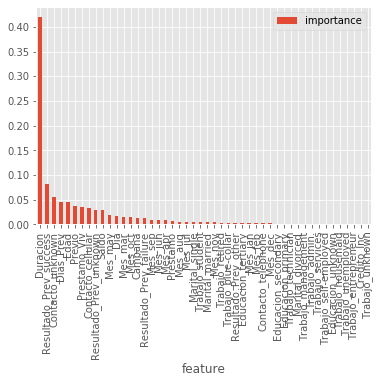

In [124]:
importances.plot.bar()

**Resumen de Precisiones Obtenidas:**

Clasificador | Prec. Datos ESTAND (%) | Prec. Datos NORM (%)
------------ | ------------- | -------------
Logistic Regression | 82,38 % | 70,26 % 
Decision Tree | 80,70 % | 69,64 % 
Random Forest | 83,16 % | 72,53 % 

Como se puede apreciar de los resultados obtenidos en las 2 evaluaciones realizadas, los 3 modelos de Clasificación presentan una mejor precisión con Datos ESTANDARIZADOS.

El modelo con mejor Precisión obtenida fue **Random Forest**, con un 83,16 %.